# Problem Statement:


A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

# Business Goal:

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Importing Required Libraries

In [568]:
#We will start will importing all the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

#we will import warnings
import warnings
warnings.filterwarnings('ignore')

## Step 1.Reading and Understanding Data

In [569]:
# We will read our dataset
#and check for first 5 records.

bike=pd.read_csv("day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [570]:
#check for shape(how many rows and columns we have)
bike.shape

(731, 16)

In [571]:
#check for info)(what are the datatypes)
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [572]:
#check for columns
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [573]:
#check for some statistics
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


## Step 1.2 check for missing values

In [574]:
#check for null values if any
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## Step 1.3 Dropping Redundant columns

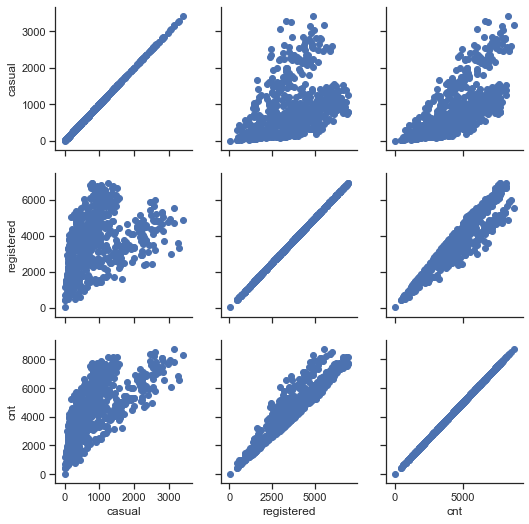

In [575]:
g=sns.PairGrid(bike, vars=["casual", "registered","cnt"])
g = g.map(plt.scatter)

We see that the casual and registered have strong correlation with cnt also if we see the dataset we will be able to see clearly that casual + registered = cnt
so let's drop the "casual" and "registered".

In [576]:
# Drop 'casual' and 'registered'.
bike.drop('casual',axis=1,inplace=True)
bike.drop('registered',axis=1,inplace=True)

Now If we see the data, "instant" is index column which we already have and "dteday" is date column but we have "yr" and "mnth" separately.
So drop "instant" and "dtedy".

In [577]:
#It was unnessary there in the data so I drop the instant column and date column to remove the redundancy
bike.drop('instant',axis=1,inplace=True)
bike.drop('dteday',axis=1,inplace=True)

In [578]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


## Step 2. Visualising the Data

#### Heatmap

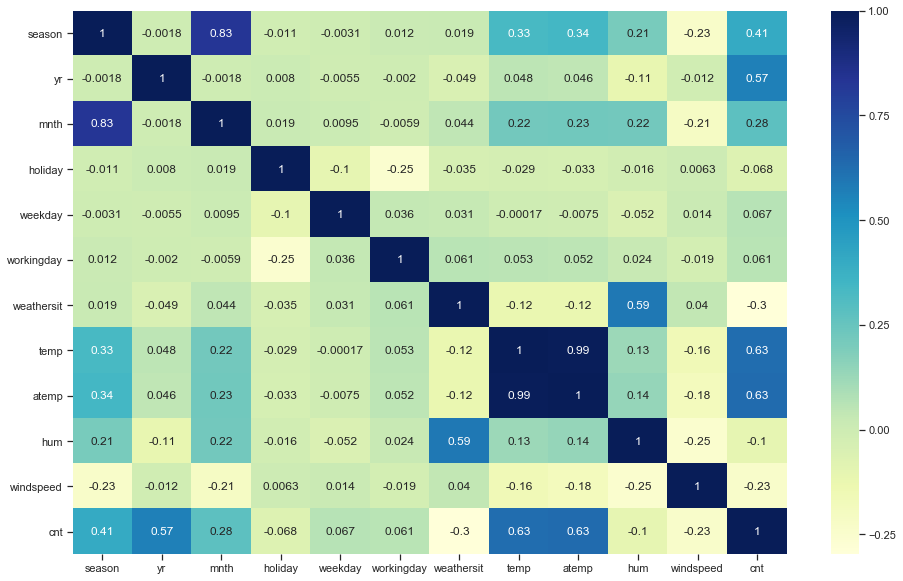

In [579]:
# Plotting heatmap
plt.figure(figsize=(16,10))
ax=sns.heatmap(bike.corr(),annot=True,cmap='YlGnBu')
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)
plt.show()

Here we see that "atemp" is highly correlated with "temp".
So drop one of them, I decided to drop "temp"

In [580]:
# Drop temp
bike.drop('temp',axis=1,inplace=True)

In [581]:
#check bike.head()
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.189405,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.212122,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.229270,0.436957,0.186900,1600


#### Pairplot

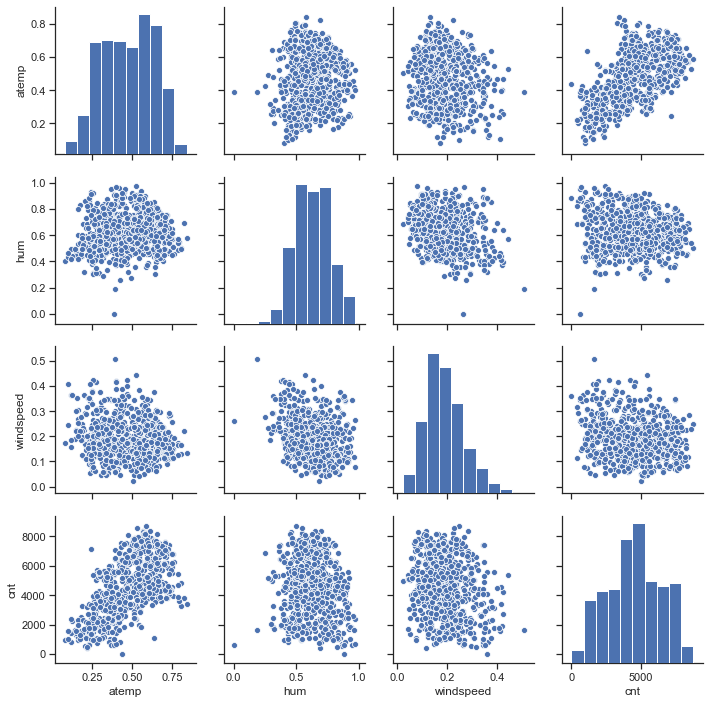

In [582]:
# we will make pairplot to visualize the numerical variable and checking some linear relation.
sns.set(style="ticks", color_codes=True)
sns.pairplot(bike,vars=["atemp","hum","windspeed","cnt"])
plt.show()

## Step 2.1 Encoding the Labels

#### 1. Season

In [583]:
map_season={1:'spring', 2:'summer', 3:'fall', 4:'winter'}
bike['season']=bike['season'].map(map_season)
bike.season.value_counts()

fall      188
summer    184
spring    181
winter    178
Name: season, dtype: int64

#### 2. mnth

In [584]:
map_mnth={1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
bike['mnth']=bike['mnth'].map(map_mnth)
bike.mnth.value_counts()

August       62
January      62
March        62
May          62
July         62
October      62
December     62
June         60
November     60
April        60
September    60
February     57
Name: mnth, dtype: int64

#### 3.weekday

In [585]:
map_weekday= {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
bike['weekday']=bike['weekday'].map(map_weekday)
bike.weekday.value_counts()

Sunday       105
Monday       105
Saturday     105
Tuesday      104
Wednesday    104
Friday       104
Thursday     104
Name: weekday, dtype: int64

#### 4.weathersit

In [586]:
map_weathersit={1: 'Clear', 2: 'Mist + Cloudy', 3: 'Light Snow', 4: 'Heavy Rain + Ice Pallets'}
bike['weathersit']=bike['weathersit'].map(map_weathersit)
bike.weathersit.value_counts()

Clear            463
Mist + Cloudy    247
Light Snow        21
Name: weathersit, dtype: int64

#### Boxplot

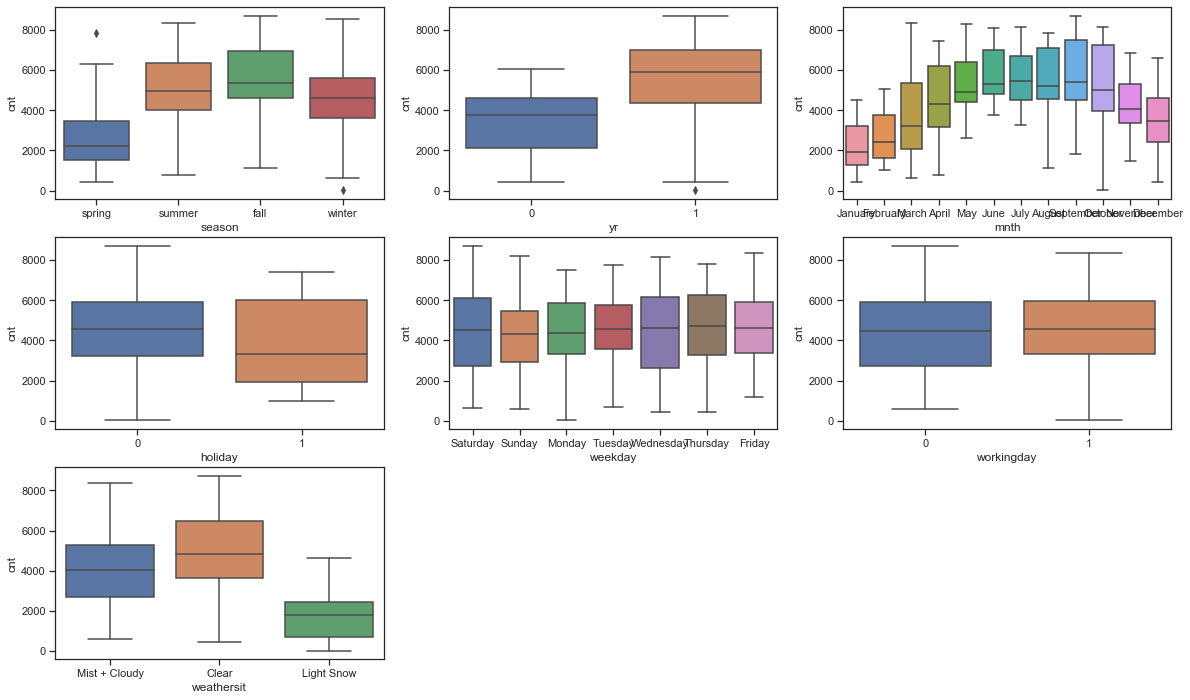

In [587]:
# to visualize categorical and continous variable we will see boxplots.
plt.figure(figsize=(20,12))
plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt',data=bike)
plt.subplot(3,3,2)
sns.boxplot(x='yr',y='cnt',data=bike)
plt.subplot(3,3,3)
sns.boxplot(x='mnth',y='cnt',data=bike)
plt.subplot(3,3,4)
sns.boxplot(x='holiday',y='cnt',data=bike)
plt.subplot(3,3,5)
sns.boxplot(x='weekday',y='cnt',data=bike)
plt.subplot(3,3,6)
sns.boxplot(x='workingday',y='cnt',data=bike)
plt.subplot(3,3,7)
sns.boxplot(x='weathersit',y='cnt',data=bike)
plt.show()

-For mnth we can see that "cnt" is first increasing then it start decreasing.

-For "weekday" It is almost same.

-Also in year 2019 it seems high.

## Step 3. Data Preparation

### step3.1 One Hot Encoding

In [588]:
# we will do one-hot encoding for season
season_dum=pd.get_dummies(bike['season'],drop_first=True)
season_dum.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [589]:
#  we will do one-hot encoding for mnth
mnth_dum=pd.get_dummies(bike['mnth'],drop_first=True)
mnth_dum.head()

,August,December,February,January,July,June,March,May,November,October,September
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [590]:
# we will do one-hot encoding for weekday
weekday_dum=pd.get_dummies(bike['weekday'],drop_first=True)
weekday_dum.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [591]:
weathersit_dum=pd.get_dummies(bike['weathersit'],drop_first=True)
weathersit_dum.head()

,Light Snow,Mist + Cloudy
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


### Step 3.2 Concatenating the Dataframes

In [592]:
# after that we will concatenate all the three with our original dataset.
bike=pd.concat([bike,season_dum,mnth_dum,weekday_dum,weathersit_dum],axis=1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist + Cloudy
0,spring,0,January,0,Saturday,0,Mist + Cloudy,0.363625,0.805833,0.160446,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,January,0,Sunday,0,Mist + Cloudy,0.353739,0.696087,0.248539,...,0,0,0,0,1,0,0,0,0,1
2,spring,0,January,0,Monday,1,Clear,0.189405,0.437273,0.248309,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,January,0,Tuesday,1,Clear,0.212122,0.590435,0.160296,...,0,0,0,0,0,0,1,0,0,0
4,spring,0,January,0,Wednesday,1,Clear,0.229270,0.436957,0.186900,...,0,0,0,0,0,0,0,1,0,0


In [593]:
# As we have dummified columns for mnth,season, weekday,weathersit so now will drop them from our dataset.
bike.drop('mnth',axis=1,inplace=True)
bike.drop('season',axis=1,inplace=True)
bike.drop('weekday',axis=1,inplace=True)
bike.drop('weathersit',axis=1,inplace=True)

In [594]:
bike.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist + Cloudy
0,0,0,0,0.363625,0.805833,0.160446,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0.353739,0.696087,0.248539,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,0.189405,0.437273,0.248309,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0.212122,0.590435,0.160296,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,0.229270,0.436957,0.186900,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [595]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 29 columns):
yr               731 non-null int64
holiday          731 non-null int64
workingday       731 non-null int64
atemp            731 non-null float64
hum              731 non-null float64
windspeed        731 non-null float64
cnt              731 non-null int64
spring           731 non-null uint8
summer           731 non-null uint8
winter           731 non-null uint8
August           731 non-null uint8
December         731 non-null uint8
February         731 non-null uint8
January          731 non-null uint8
July             731 non-null uint8
June             731 non-null uint8
March            731 non-null uint8
May              731 non-null uint8
November         731 non-null uint8
October          731 non-null uint8
September        731 non-null uint8
Monday           731 non-null uint8
Saturday         731 non-null uint8
Sunday           731 non-null uint8
Thursday         731 non-

## Step 4. Splitting the Data into Training and Testing Sets

In [596]:
# Perform Train and Test split
bike_train,bike_test=train_test_split(bike,train_size=0.7,random_state=80)
print(bike_train.shape)
print(bike_test.shape)

(511, 29)
(220, 29)


### Step 4.1 Scaling the features

In [597]:
#we will do scaling so initialise scaler
scaler=MinMaxScaler()

In [598]:
# It has to be performed on numerical value so will fit_transform on our train data.
num_vars=['atemp','hum','windspeed','cnt']
bike_train[num_vars]=scaler.fit_transform(bike_train[num_vars])
bike_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist + Cloudy
593,1,0,1,0.749065,0.533848,0.246158,0.866111,0,0,0,...,0,0,0,0,0,1,0,0,0,0
660,1,0,1,0.517619,0.584404,0.121820,0.800072,0,0,1,...,1,0,1,0,0,0,0,0,0,0
129,0,0,1,0.571226,0.502999,0.192300,0.527828,0,1,0,...,0,0,0,0,0,0,1,0,0,0
590,1,0,1,0.759261,0.560840,0.234647,0.778945,0,0,0,...,0,0,1,0,0,0,0,0,0,0
154,0,0,0,0.668220,0.469152,0.207702,0.592901,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [599]:
# Describe the numerical variables.
bike_train[num_vars].describe()

,atemp,hum,windspeed,cnt
count,511.000000,511.000000,511.000000,511.000000
mean,0.506333,0.643114,0.348078,0.492383
std,0.219942,0.148758,0.159613,0.233471
min,0.000000,0.000000,0.000000,0.000000
25%,0.322498,0.527849,0.232057,0.333333
50%,0.524430,0.640532,0.332073,0.496197
75%,0.688653,0.750214,0.435276,0.667029
max,1.000000,1.000000,1.000000,1.000000


### Step 4.2 Divide data into X and y

In [600]:
# Divide train data into X and y.
X_train=bike_train
y_train=bike_train.pop('cnt')

## Step 5. Building a linear model

### Step 5.1 Using RFE for feature Selection

In [601]:
#Initialise model Instance
lm=LinearRegression()

In [602]:
# we will fit() on train data
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [603]:
# Pass model instance and no. of variables to RFE to let the model select features on its own.
rfe=RFE(lm,15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=15, step=1, verbose=0)

In [604]:
# theses are the features that model has selected.
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 7),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 11),
 ('winter', True, 1),
 ('August', False, 6),
 ('December', True, 1),
 ('February', True, 1),
 ('January', True, 1),
 ('July', True, 1),
 ('June', False, 5),
 ('March', False, 14),
 ('May', False, 2),
 ('November', True, 1),
 ('October', False, 4),
 ('September', True, 1),
 ('Monday', False, 8),
 ('Saturday', False, 3),
 ('Sunday', False, 10),
 ('Thursday', False, 12),
 ('Tuesday', False, 9),
 ('Wednesday', False, 13),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1)]

In [605]:
#columns that RFE is supportiing
col=X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'spring', 'winter',
       'December', 'February', 'January', 'July', 'November', 'September',
       'Light Snow', 'Mist + Cloudy'],
      dtype='object')

In [606]:
#columns that RFE does not support.
X_train.columns[~rfe.support_]

Index(['workingday', 'summer', 'August', 'June', 'March', 'May', 'October',
       'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

#### Model 1

In [607]:
# Now will train the model using features that RFE has selected.
X_train_rfe=X_train[col]
X_train_rfe=sm.add_constant(X_train_rfe) # adding constant
lm=sm.OLS(y_train,X_train_rfe).fit()    # Running linear mode;
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     180.2
Date:                Sun, 09 Aug 2020   Prob (F-statistic):          2.18e-189
Time:                        01:35:43   Log-Likelihood:                 495.41
No. Observations:                 511   AIC:                            -958.8
Df Residuals:                     495   BIC:                            -891.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3511      0.033     10.552

We see that R2 is 84.5% and Adj R2 is 84%.
when we see all the features "February" is having p-value >0.05. So we need to drop it.
we will see VIF also.

In [608]:
#checking VIF of all the variables.
vif=pd.DataFrame()
X=X_train_rfe
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
0,const,65.07
6,spring,3.70
3,atemp,3.42
10,January,2.28
7,winter,2.21
9,February,2.03
4,hum,1.90
12,November,1.78
15,Mist + Cloudy,1.57
8,December,1.52


Dropping Const

In [609]:
X_train_new1= X_train_rfe.drop('const',axis=1)

checking VIF again

In [610]:
#checking VIF of all the variables.
vif=pd.DataFrame()
X=X_train_new1
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
3,hum,23.11
2,atemp,15.58
4,windspeed,4.75
5,spring,4.43
6,winter,2.78
9,January,2.43
14,Mist + Cloudy,2.32
8,February,2.17
0,yr,1.99
11,November,1.89


#### Model 2

In [611]:
#Dropping Februry and training the model
X_train_new2=X_train_new1.drop(["February"],axis=1)
X_train_lm2=sm.add_constant(X_train_new2)
lm=sm.OLS(y_train,X_train_lm2).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.7
Date:                Sun, 09 Aug 2020   Prob (F-statistic):          9.30e-190
Time:                        01:35:44   Log-Likelihood:                 493.54
No. Observations:                 511   AIC:                            -957.1
Df Residuals:                     496   BIC:                            -893.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3436      0.033     10.372

In [612]:
#check VIF again
vif=pd.DataFrame()
X=X_train_new2
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
3,hum,22.78
2,atemp,15.15
4,windspeed,4.70
5,spring,2.90
6,winter,2.76
13,Mist + Cloudy,2.31
0,yr,1.99
10,November,1.87
8,January,1.67
9,July,1.49


here p value < 0.05 but VIF of hum is highest so Drop "hum".

#### Model 3

In [613]:
# dropping holiday and training the model.
X_train_new3=X_train_new2.drop(["hum"],axis=1)
X_train_lm3=sm.add_constant(X_train_new3)
lm=sm.OLS(y_train,X_train_lm3).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     199.0
Date:                Sun, 09 Aug 2020   Prob (F-statistic):          2.07e-187
Time:                        01:35:44   Log-Likelihood:                 485.19
No. Observations:                 511   AIC:                            -942.4
Df Residuals:                     497   BIC:                            -883.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2592      0.026      9.895

In [614]:
#checking VIF
vif=pd.DataFrame()
X=X_train_new3
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
2,atemp,4.91
3,windspeed,4.59
5,winter,2.47
4,spring,2.36
0,yr,1.99
9,November,1.83
7,January,1.63
12,Mist + Cloudy,1.54
8,July,1.45
6,December,1.38


Dropping "holiday" on the basis of p values

#### Model 4

In [615]:
#dropping hum and training the model
X_train_new4=X_train_new3.drop(["holiday"],axis=1)
X_train_lm4=sm.add_constant(X_train_new4)
lm=sm.OLS(y_train,X_train_lm4).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     213.2
Date:                Sun, 09 Aug 2020   Prob (F-statistic):          2.16e-187
Time:                        01:35:45   Log-Likelihood:                 482.35
No. Observations:                 511   AIC:                            -938.7
Df Residuals:                     498   BIC:                            -883.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2595      0.026      9.858

In [616]:
#checking VIF again to check multicollinearity.
vif=pd.DataFrame()
X=X_train_new4
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
1,atemp,4.91
2,windspeed,4.59
4,winter,2.47
3,spring,2.36
0,yr,1.99
8,November,1.81
6,January,1.63
11,Mist + Cloudy,1.54
7,July,1.44
5,December,1.38


Dropping "January" on the basis of p values

#### Model 5

In [617]:
# I decided to drop January also on the basis of p value.
X_train_new5=X_train_new4.drop(["January"],axis=1)
X_train_lm5=sm.add_constant(X_train_new5)
lm=sm.OLS(y_train,X_train_lm5).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.9
Date:                Sun, 09 Aug 2020   Prob (F-statistic):          5.55e-187
Time:                        01:35:45   Log-Likelihood:                 478.56
No. Observations:                 511   AIC:                            -933.1
Df Residuals:                     499   BIC:                            -882.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2457      0.026      9.450

In [618]:
#checking VIF
vif=pd.DataFrame()
X=X_train_new5
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
1,atemp,4.85
2,windspeed,4.56
4,winter,2.45
0,yr,1.99
7,November,1.80
3,spring,1.78
10,Mist + Cloudy,1.54
6,July,1.44
5,December,1.34
8,September,1.21


Dropping "July" on the basis of p value

#### Model 6

In [619]:
# ro reduce the number of extra variables I am dropping July on the basis of p value.
X_train_new6=X_train_new5.drop(["July"],axis=1)
X_train_lm6=sm.add_constant(X_train_new6)
lm=sm.OLS(y_train,X_train_lm6).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     245.3
Date:                Sun, 09 Aug 2020   Prob (F-statistic):          1.17e-185
Time:                        01:35:45   Log-Likelihood:                 472.57
No. Observations:                 511   AIC:                            -923.1
Df Residuals:                     500   BIC:                            -876.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2582      0.026      9.926

#### This comes out as my Final Model with 10 variables each with p value <0.05 and seems highly significant.

In [620]:
#checking VIF 
vif=pd.DataFrame()
X=X_train_new6
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
2,windspeed,4.48
1,atemp,3.77
4,winter,2.41
0,yr,1.98
6,November,1.80
3,spring,1.78
9,Mist + Cloudy,1.52
5,December,1.34
7,September,1.17
8,Light Snow,1.08


#### VIF < 5 for all the 10 variables.

## Step 6. Residual Analysis of the train data

In [621]:
#calculting Predicted value of y for train set.
y_train_pred=lm.predict(X_train_lm6)
y_train_pred

593    0.793138
660    0.788014
129    0.467253
590    0.798742
154    0.504906
         ...   
3      0.146470
522    0.748038
211    0.568437
188    0.443049
175    0.509306
Length: 511, dtype: float64

Text(0.5, 0, 'Errors')

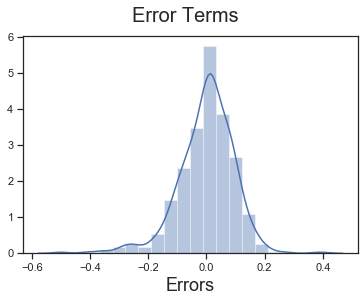

In [622]:
#visualizing error terms.
fig=plt.figure()
res=y_train - y_train_pred
sns.distplot(res,bins=20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)     

#### Error terms are normally distributed with zero mean.

whatever preprocessing we have performed on train set, we have to perform on Test set.

## Step 7. Making Predictions

### Step 7.1 Applying the scaling on the test sets

In [623]:
#So performing scaling on Test by Transform().
num_vars=['atemp','hum','windspeed','cnt']
bike_test[num_vars]=scaler.fit_transform(bike_test[num_vars])
bike_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist + Cloudy
419,1,0,1,0.457263,0.686567,0.489063,0.406071,1,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,1,0.212359,0.360526,0.118372,0.185632,1,0,0,...,0,0,0,0,0,1,0,0,0,0
347,0,0,1,0.357229,0.576890,0.046722,0.435720,0,0,1,...,0,0,0,0,0,0,0,1,0,1
144,0,0,1,0.739102,0.625222,0.280341,0.580804,0,1,0,...,0,0,0,0,0,0,0,1,0,0
228,0,0,1,0.809543,0.445526,0.253877,0.547521,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [624]:
#Describing numerical variables for the test set.
bike_test[num_vars].describe()

,atemp,hum,windspeed,cnt
count,220.000000,220.000000,220.000000,220.000000
mean,0.543904,0.532084,0.366791,0.523919
std,0.224225,0.204098,0.194908,0.228452
min,0.000000,0.000000,0.000000,0.000000
25%,0.354401,0.379533,0.228567,0.363501
50%,0.557296,0.540950,0.332517,0.531700
75%,0.724104,0.676963,0.474287,0.677751
max,1.000000,1.000000,1.000000,1.000000


### Step 7.2 Dividing into X_test and y_test

In [625]:
# Decide X and y for the test set.
X_test=bike_test
y_test=bike_test.pop('cnt')

In [626]:
# adding constant as our final trained model also having constant.
X_test_new=X_test[X_train_new6.columns]
X_test_new=sm.add_constant(X_test_new)
X_test_new.head()

,const,yr,atemp,windspeed,spring,winter,December,November,September,Light Snow,Mist + Cloudy
419,1.0,1,0.457263,0.489063,1,0,0,0,0,0,1
5,1.0,0,0.212359,0.118372,1,0,0,0,0,0,0
347,1.0,0,0.357229,0.046722,0,1,1,0,0,0,1
144,1.0,0,0.739102,0.280341,0,0,0,0,0,0,0
228,1.0,0,0.809543,0.253877,0,0,0,0,0,0,0


In [629]:
#predicting Y values on our unseen data(Test data)
y_test_pred=lm.predict(X_test_new)

#### R Squared

In [630]:
#checking R2 for our predicted model.
r2=r2_score(y_true=y_test,y_pred=y_test_pred)
print(r2)

0.7926322100414918


#### Adjusted R squared

In [632]:
#checking adjusted R squared for our predicted model.
adj_r2 = 1 - (1-r2)*(len(bike) - 1) / (len(bike) - (bike.shape[1] - 1) - 1)
print(adj_r2)

0.7843611301001268


## Step 8. Model Evaluation

Text(0, 0.5, 'y_pred')

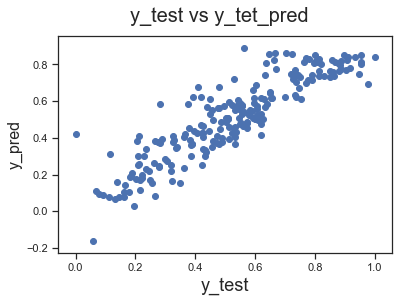

In [633]:
#Evaluating the final model.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_tet_pred', fontsize=20)           # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

we can see that equation of you best fitted line is:
    
cnt      =    0.26 * yr  +  0.41* atemp  -  0.13*windspeed  -  0.14*spring  +  0.07*winter  -  0.07*December - 0.07*November                     +                     0.05*September -   0.27* Light Snow  -   0.08*(Mist + Cloudy)

#### Train model -

R_squared             -   0.831

Adjusted R_squared    -   0.827
              
              
#### Test model -

R_squared             -   0.792

Adjusted R_squared    -   0.784

#### The top 5 variables that are seen effecting and benefitting the Bike Rental count are as follows:
1. Temperature : 0.4081
2. Light Snow  : -0.2717
3. year        : 0.2601
4. Spring      : -0.1384
5. windspeed   : -0.1254

High Temperature positively impact bike rentals.

Also Yearly Bike rentals are also increasing.